In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stocks-dataset/TSLA-2.csv


**Project Overview:**

This project involves using a Long Short-Term Memory (LSTM) neural network to predict Tesla stock prices. The LSTM model is trained on historical stock data to forecast future prices based on past trends.

Dataset:

The dataset, TSLA2.csv, contains historical stock data with the following columns:

Date: The date of the stock data.
Open: The opening price of the stock.
High: The highest price of the stock.
Low: The lowest price of the stock.
Close: The closing price of the stock.
Adj Close: The adjusted closing price of the stock.
Volume: The trading volume.
Model Architecture:

The LSTM model is constructed using TensorFlow and Keras libraries and consists of the following layers:

Two LSTM Layers: Each with 50 units to capture temporal dependencies in the data. Dropout Layers: Applied to prevent overfitting by randomly setting a fraction of input units to 0 during training. Dense Output Layer: With one unit to predict the stock price

# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# **EDA**

In [3]:
data = pd.read_csv('/kaggle/input/tesla-stocks-dataset/TSLA-2.csv')
df=data

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3557,2024-08-16,211.149994,219.800003,210.800003,216.119995,216.119995,88765100
3558,2024-08-19,217.070007,222.979996,214.089996,222.720001,222.720001,76435200
3559,2024-08-20,224.880005,228.220001,219.559998,221.100006,221.100006,74001200
3560,2024-08-21,222.669998,224.660004,218.860001,223.270004,223.270004,70146000


In [5]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

First few rows of the dataset:
         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500

Summary statistics of the dataset:
              Open         High          Low        Close    Adj Close  \
count  3562.000000  3562.000000  3562.000000  3562.000000  3562.000000   
mean     76.144584    77.814867    74.365471    76.126834    76.126834   
std     102.704572   104.986967   100.219504   102.631107   102.631107   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%      11.653167    11.956167    11.328833    11.680500    11.680500   
50%      17.493334    17.713000  

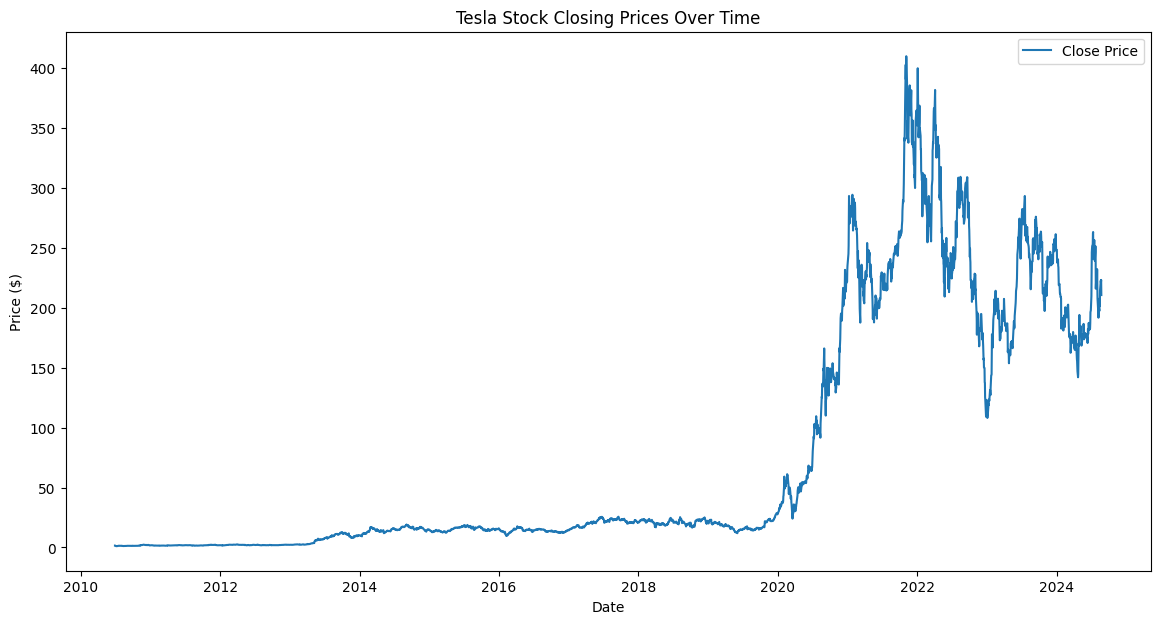

In [6]:
# Plot the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.title('Tesla Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

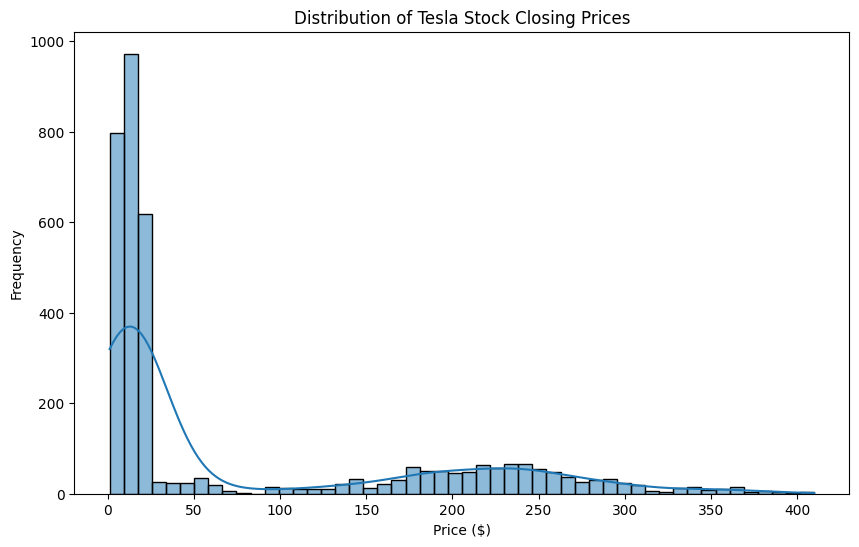

In [7]:
# Plot the distribution of the closing prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Tesla Stock Closing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

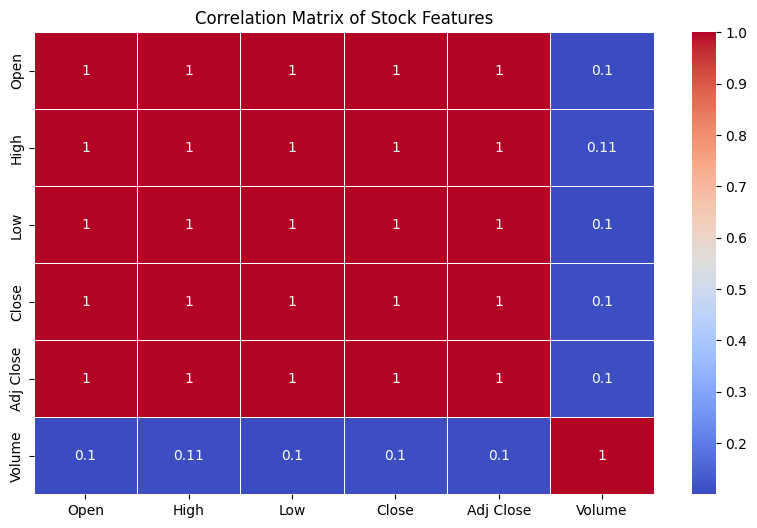

In [8]:
# Plot the correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock Features')
plt.show()


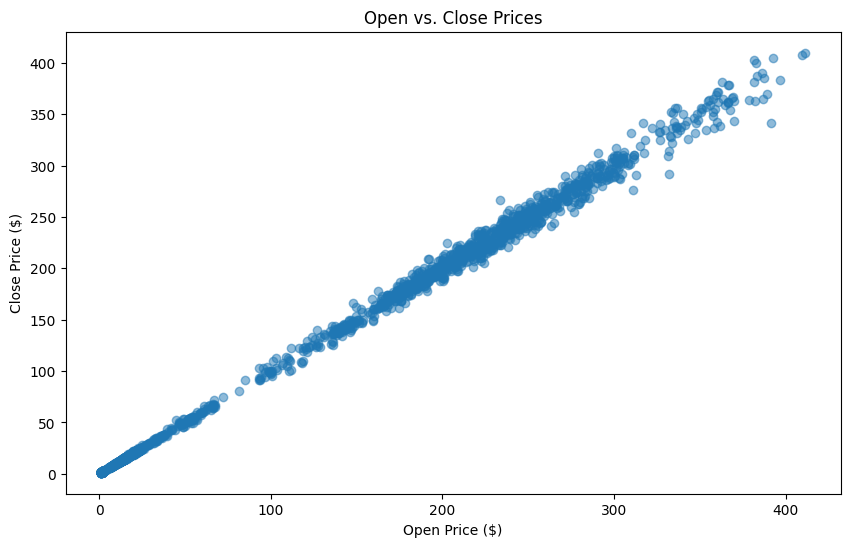

In [9]:
# Visualize the relationship between Open and Close prices
plt.figure(figsize=(10, 6))
plt.scatter(df['Open'], df['Close'], alpha=0.5)
plt.title('Open vs. Close Prices')
plt.xlabel('Open Price ($)')
plt.ylabel('Close Price ($)')
plt.show()


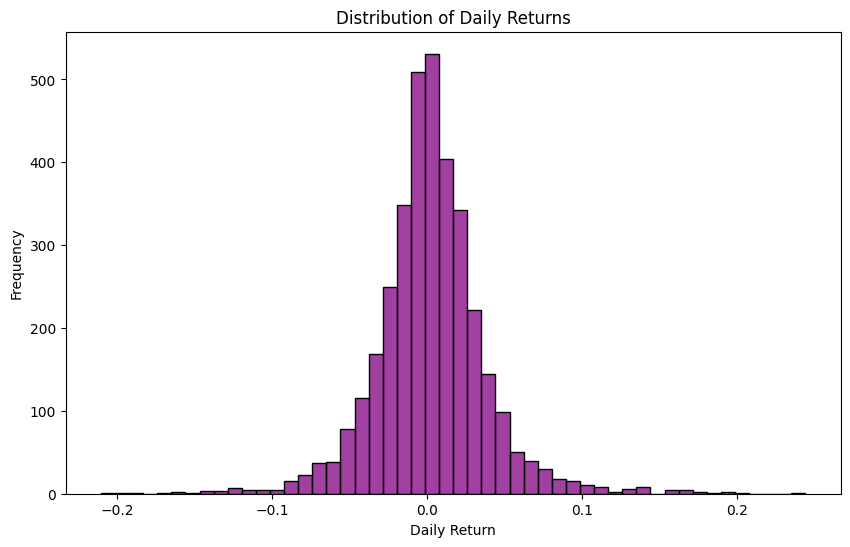

                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   

            Daily Return  
Date                      
2010-06-29           NaN  
2010-06-30     -0.002512  
2010-07-01     -0.078473  
2010-07-02     -0.125683  
2010-07-06     -0.160937  


In [10]:
# Visualize daily returns
df['Daily Return'] = df['Close'].pct_change()
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return'].dropna(), bins=50, color='purple')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

print(df.head())

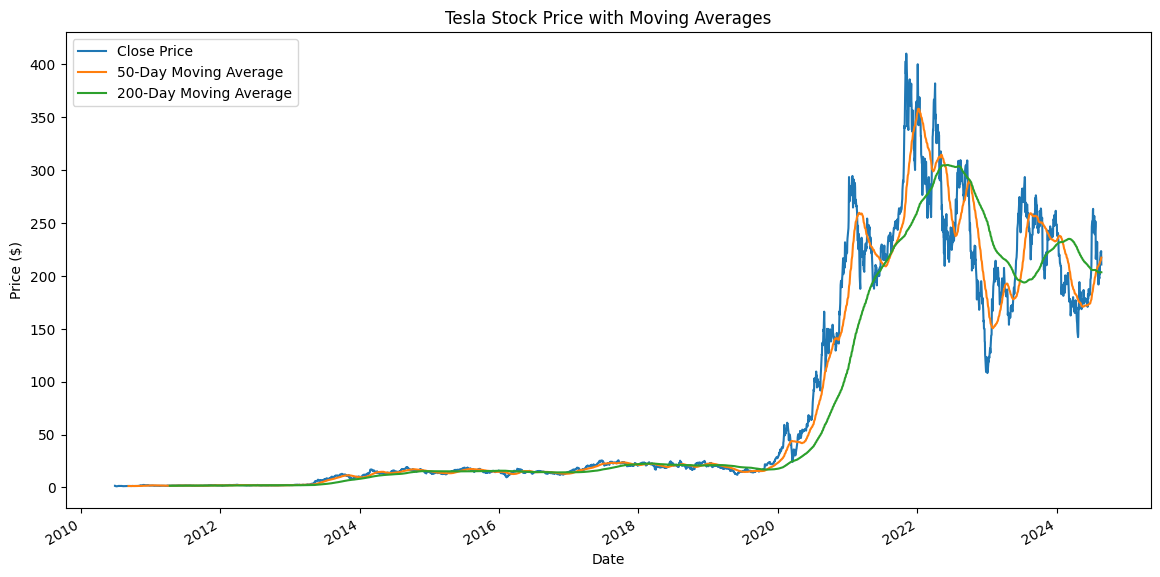

In [11]:
# Plot the moving average of the closing prices
plt.figure(figsize=(14, 7))
df['Close'].plot(label='Close Price')
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
df['MA50'].plot(label='50-Day Moving Average')
df['MA200'].plot(label='200-Day Moving Average')
plt.title('Tesla Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# **Data Preprocessing**

In [12]:
close_price = data['Close'].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

df.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,MA50,MA200
Date,,,,,,,,,
2024-08-16,211.149994,219.800003,210.800003,216.119995,216.119995,88765100,0.009246,213.6280,203.1743
2024-08-19,217.070007,222.979996,214.089996,222.720001,222.720001,76435200,0.030539,214.5236,203.2837
2024-08-20,224.880005,228.220001,219.559998,221.100006,221.100006,74001200,-0.007274,215.3960,203.3609
2024-08-21,222.669998,224.660004,218.860001,223.270004,223.270004,70146000,0.009815,216.3856,203.3847
2024-08-22,223.820007,224.800003,210.320007,210.660004,210.660004,79337500,-0.056479,217.1856,203.3382


In [13]:
# Creating sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
       # Create a sequence of data from day 'i' to 'i + seq_length - 1'
        X.append(data.iloc[i:i + seq_length].values)

        # The target value is the stock price for the day immediately after the sequence
        y.append(data.iloc[i + seq_length]['Close'])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 25

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

In [14]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.85) 
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [15]:
print(y_test.shape)

(531,)


In [16]:
print(X_train.shape)

(3006, 25, 6)


# **Building the LSTM Model**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam


In [18]:
# Build the LSTM model
model = Sequential()

# First LSTM layer with Dropout regularization
model.add(LSTM(units=100, return_sequences=True, input_shape=(60, 6)))
model.add(Dropout(0.3))

# Second LSTM layer with Dropout regularization
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer without return_sequences
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Fully connected Dense layer
model.add(Dense(units=25, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model with Adam optimizer and mean squared error loss
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Set up early stopping and model checkpoint with .keras format
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

# Display the model summary
model.summary()

# Fit the model to the training data
# Assume X_train and y_train are already defined and preprocessed
history = model.fit(X_train, y_train, 
                    epochs=30, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, model_checkpoint])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 100)        │        42,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,701 (604.30 KB)

 Trainable params: 154,701 (604.30 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 2.2355e-04 - val_loss: 0.0165
Epoch 2/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 5.7329e-05 - val_loss: 0.0159
Epoch 3/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 4.3929e-05 - val_loss: 0.0057
Epoch 4/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 3.5399e-05 - val_loss: 0.0310
Epoch 5/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 4.5862e-05 - val_loss: 0.0174
Epoch 6/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 3.6547e-05 - val_loss: 0.0052
Epoch 7/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 2.9690e-05 - val_loss: 0.0036
Epoch 8/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 2.9725e-05 - val_loss: 0.0044
Epoch 9/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 3.3724e-05 - val_loss: 0.0150
Epoch 10/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 4.7921e-05 - val_loss: 0.0054
Epoch 11/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 4.0957e-05 - val_loss: 0.0037
Epoch 12/30
76/76 ━

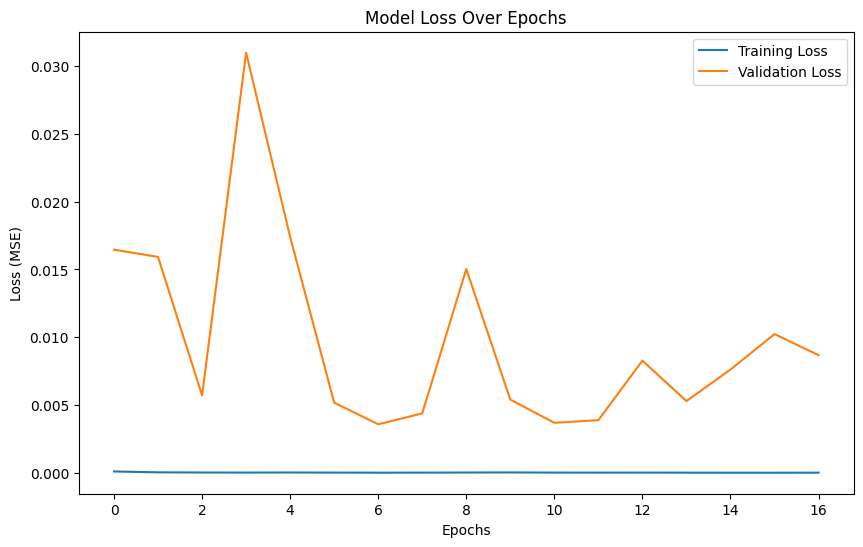

In [19]:
# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [20]:
# Print the final training and validation loss
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]
print(f'Final Training Loss (MSE): {train_loss:.4f}')
print(f'Final Validation Loss (MSE): {val_loss:.4f}')

# Calculate RMSE on the training and validation sets
train_rmse = np.sqrt(train_loss)
val_rmse = np.sqrt(val_loss)
print(f'Final Training RMSE: {train_rmse:.4f}')
print(f'Final Validation RMSE: {val_rmse:.4f}')

# If you have test data, evaluate the model on the test set
# Assume X_test and y_test are already defined and preprocessed
test_loss = model.evaluate(X_test, y_test, verbose=0)
test_rmse = np.sqrt(test_loss)
print(f'Test Loss (MSE): {test_loss:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Final Training Loss (MSE): 0.0000
Final Validation Loss (MSE): 0.0087
Final Training RMSE: 0.0055
Final Validation RMSE: 0.0932
Test Loss (MSE): 0.0049
Test RMSE: 0.0699


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


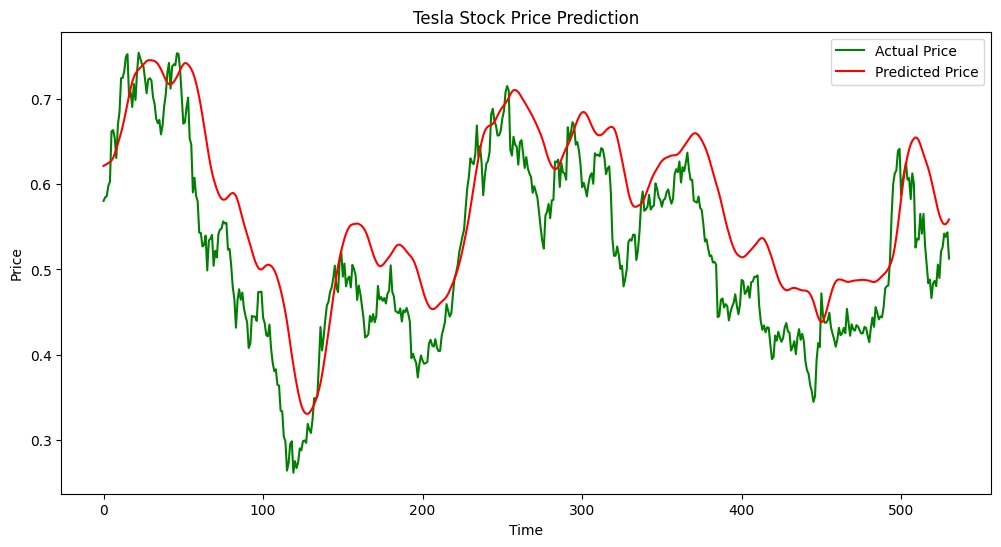

In [21]:
#Visualizing the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Price', color='green')
plt.plot(model.predict(X_test), label='Predicted Price', color='red')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()